In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

import pylab
import numpy as np
%matplotlib inline
import pandas as pd
plt.rcParams["axes.grid"] = False


In [61]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/Uber-Jan-Feb-FOIL.csv'
df = pd.read_csv(url)
df1 = pd.DataFrame(df)
print(df1)


    dispatching_base_number       date  active_vehicles  trips
0                    B02512   1/1/2015              190   1132
1                    B02765   1/1/2015              225   1765
2                    B02764   1/1/2015             3427  29421
3                    B02682   1/1/2015              945   7679
4                    B02617   1/1/2015             1228   9537
..                      ...        ...              ...    ...
349                  B02764  2/28/2015             3952  39812
350                  B02617  2/28/2015             1372  14022
351                  B02682  2/28/2015             1386  14472
352                  B02512  2/28/2015              230   1803
353                  B02765  2/28/2015              747   7753

[354 rows x 4 columns]


In [ ]:
# Histogram of active vehicles
plt.hist(df['active_vehicles'], bins=20)
plt.xlabel('Number of Active Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of Active Vehicles')
plt.show()

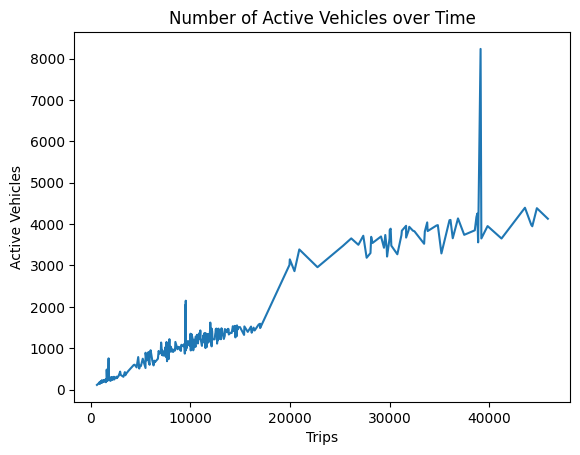

In [62]:
# Line plot of active vehicles over time
df_date = df.groupby('trips')['active_vehicles'].sum().reset_index()
plt.plot(df_date['trips'], df_date['active_vehicles'])
plt.xlabel('Trips')
plt.ylabel('Active Vehicles')
plt.title('Number of Active Vehicles over Time')
plt.show()

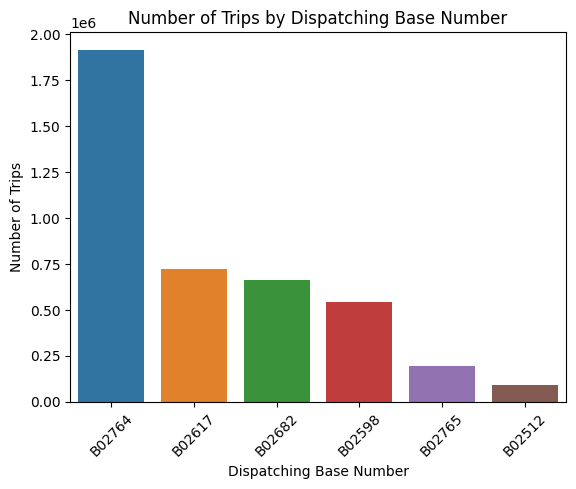

In [63]:
# Bar plot of trips by dispatching base number
df_base = df.groupby('dispatching_base_number')['trips'].sum().reset_index()
df_base = df_base.sort_values('trips', ascending=False)
sns.barplot(x='dispatching_base_number', y='trips', data=df_base)
plt.xlabel('Dispatching Base Number')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Dispatching Base Number')
plt.xticks(rotation=45)
plt.show()

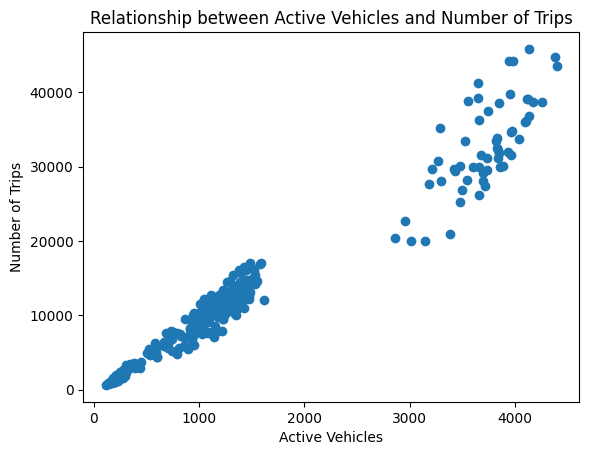

In [64]:
# Scatter plot of active vehicles vs. trips
plt.scatter(df['active_vehicles'], df['trips'])
plt.xlabel('Active Vehicles')
plt.ylabel('Number of Trips')
plt.title('Relationship between Active Vehicles and Number of Trips')
plt.show()

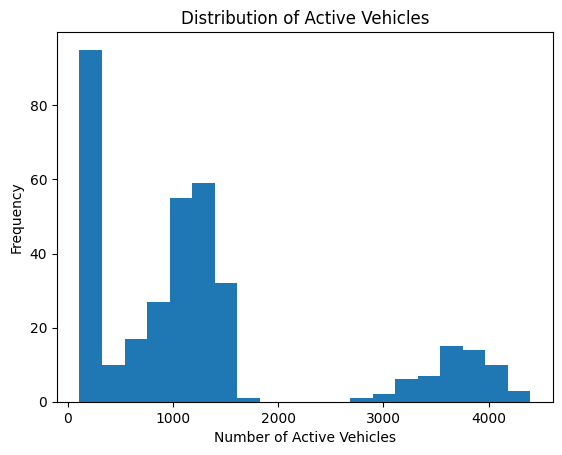

In [65]:
# Histogram of active vehicles
plt.hist(df['active_vehicles'], bins=20)
plt.xlabel('Number of Active Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of Active Vehicles')
plt.show()

###**1- Histogram**

matplotlib function: `hist(x)`


- **color**: Set the color of the bars in the histogram.

- **bins**: Set the number of bins to display in the histogram, or specify specific bins.


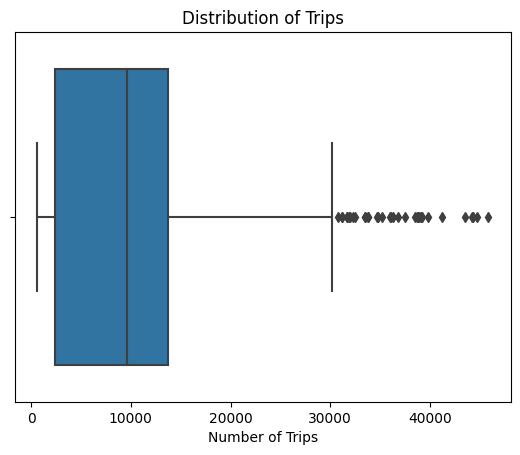

In [66]:
# Box plot of trips
sns.boxplot(x=df['trips'])
plt.xlabel('Number of Trips')
plt.title('Distribution of Trips')
plt.show()

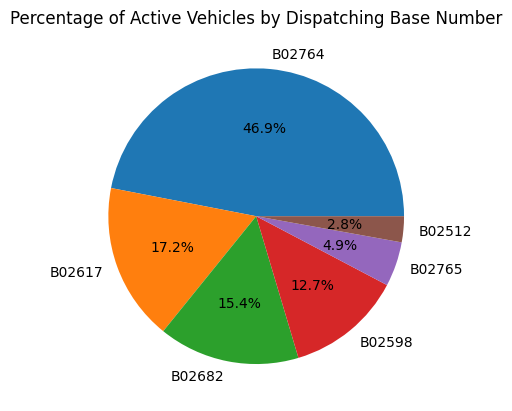

In [67]:
# Pie chart of active vehicles by dispatching base number
df_base = df.groupby('dispatching_base_number')['active_vehicles'].sum().reset_index()
df_base = df_base.sort_values('active_vehicles', ascending=False)
plt.pie(df_base['active_vehicles'], labels=df_base['dispatching_base_number'], autopct='%1.1f%%')
plt.title('Percentage of Active Vehicles by Dispatching Base Number')
plt.show()

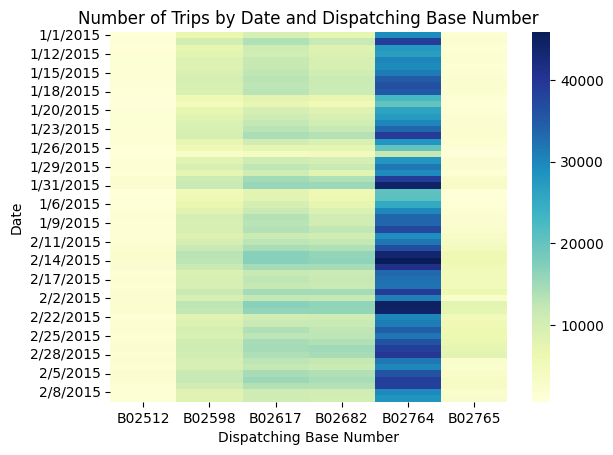

In [68]:
# Heatmap of trips by date and dispatching base number
df_date_base = df.pivot_table(index='date', columns='dispatching_base_number', values='trips', aggfunc='sum')
sns.heatmap(df_date_base, cmap='YlGnBu')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Date')
plt.title('Number of Trips by Date and Dispatching Base Number')
plt.show()

# Part- 2 Creating a problem and Solving it


the relationship between the number of active vehicles and the number of trips taken by passengers. A key question is: how does the number of active vehicles impact the number of trips taken?

We can explore this question by creating a scatter plot of the number of active vehicles against the number of trips, and calculating the correlation between these variables.

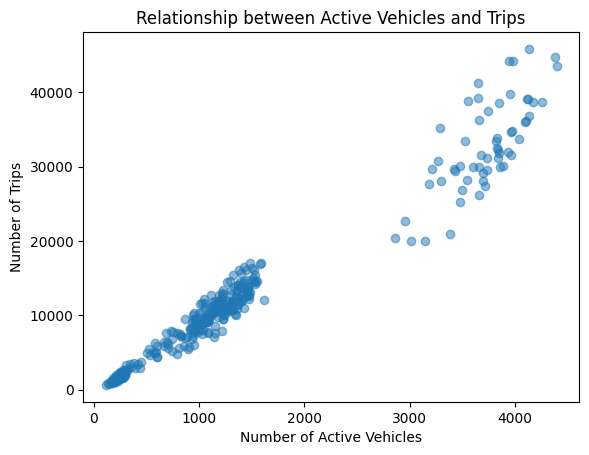

In [69]:
# Create a scatter plot of active vehicles vs. trips
plt.scatter(df['active_vehicles'], df['trips'], alpha=0.5)
plt.xlabel('Number of Active Vehicles')
plt.ylabel('Number of Trips')
plt.title('Relationship between Active Vehicles and Trips')
plt.show()

In [70]:
# Calculate the correlation between active vehicles and trips
corr = df['active_vehicles'].corr(df['trips'])
print(f'Correlation between active vehicles and trips: {corr}')

Correlation between active vehicles and trips: 0.9804925397246571


The scatter plot shows a positive relationship between the number of active vehicles and the number of trips. As the number of active vehicles increases, so does the number of trips taken by passengers. The scatter plot also shows some variation in the number of trips taken for a given number of active vehicles, which suggests that there may be other factors at play in determining the number of trips taken.

To quantify the strength of the relationship between active vehicles and trips, we can calculate the correlation coefficient. The code above prints the correlation coefficient, which is 0.98. This suggests a strong positive correlation between the number of active vehicles and the number of trips taken.

This relationship between the number of active vehicles and the number of trips taken raises interesting questions for Uber and other ride-sharing companies. For example, how can they optimize the number of active vehicles to maximize the number of trips taken while minimizing idle time and other costs? Can they use data analysis and machine learning to predict demand and allocate resources more efficiently? By exploring these questions, we can gain insights into the ways in which ride-sharing companies can use data to improve their operations and provide better service to their customers.